# 管网水利计算模型（过程+图形展示）

 计算用示意图
 其中1号节点为定压点
 ![供热系统仿真图](./供热系统-仿真图.png)  

$$ 这种绝对路径图片引用不成功：![供热系统仿真图](file:///C:/Users/HUAWEI/Documents/Heatig/供热系统-仿真图.png)$$
$$ 这种相对路径的图片引用成功了：![供热系统仿真图](./供热系统-仿真图.png)$$

# 管道总压力损失

$$ P_z  = P_y + P_j $$
    
式中: 
   * $ P_z -- 管段总压降，  Pa$
   * $ P_y -- 管段沿程阻力，  Pa$   
   * $ P_j -- 管段局部，  Pa$

## 沿程阻力
$$ P_y  = R_m \cdot l $$

式中: 
   * $ R_m -- 管道单位长度摩擦阻力，简称比模阻，Pa/m $  
   * $ l -- 管道长度，  m$   
### 比摩阻计算公式

$$ R_m = \frac{\lambda}{d} \cdot \frac{\rho v^{2}}{2}  $$

式中: 
   * $ \lambda -- 管道摩擦阻力系数 $  
   * $ d -- 管道内径，  m$ 
   * $ \rho -- 热媒密度， kg/m^3 $  
   * $ v -- 管道内流体的流速，  m/s$ 

在供热管网水流量 G 已知的情况下，比摩阻 $R_m$还可以利用下式计算：
$$ R_m =6.25 \times 10^{-2}\cdot \frac{\lambda G^2_t}{\rho d^5} $$

式中: 
   * $ G_t -- 管道水流量， t/h $  
   * $ \lambda -- 管道摩擦阻力系数 $ 
   * $ d -- 管道内径，  m$ 
   * $ \rho -- 热媒密度， kg/m^3 $  
  

### 摩擦阻力系数

$ 根据流体力学知识，\lambda是管流雷诺数（Re）和相对粗糙度（\frac{K}{d}）的函数$
 * $ 其中 K 为管道材料的绝对粗糙度，d 为管段的直径或当量直径，单位：m$ 
 
 
摩擦阻力系数$ \lambda$ 的公式与流态有关，虽然室内热水采暖管网和给水管网流动几乎处于紊流过渡区，然而，对于室外热水管网，管径一般在 40mm 以上， 流速较快，一般大于0.5m/s，因此其流动状态大多处于阻力平方区，则管道阻力系数可采用希弗林逊推荐公式
$$ \lambda = 0.11\cdot\left(\frac{K}{d}\right)^{0.25}   $$
管段的当量绝对粗糙度是与管段的内壁的情况有关，主要是水垢积淀，腐蚀生锈等，对于室外热水管网，K 一般取值为 0.5mm  

### 整理
$$ P_y  = 6.88 \times 10^{-3}\cdot \frac{K^{0.25}l}{d^{5.25}\rho }G^2_t $$

## 局部阻力
$$ P_j  =  \sum\xi \frac{\rho v^2}{2}$$
式中: 
   * $ \sum\xi  -- 管段中总的局部阻力系数 $  

在热水网路计算中，常采用当量长度法，即将管段的局部阻力损失折合成相当的沿程损失，当量长度 $l_d$通常由下式计算：

$$ l_d  = 9.1\frac{d^{1.25}}{K^{0.25}} \sum\xi $$

在工程上，面对大型复杂的供热网络，管段较多，为例方便计算，常将局部阻力当量长度 ld按占实际管长 l 的百分比 α 来进行计算，即 :
$$ l_d  = \alpha l $$
$ \alpha $具体的数值参考城市《城市热力网设计规范》可得

## 管网阻力系数
$$  \Delta P  = SG^2 $$

式中: 
   * $ \Delta P -- 总压降， Pa $  
   * $ S -- 管段阻力系数， Pa/$(t/h)^2 $ $
   * $ G -- 管段流量，  t/h$ 

整理以上公式所得:
$$  S  = 6.88 \times 10^{-3}\cdot \frac{K^{0.25}}{d^{5.25}\rho }(l+l_d)= 6.88 \times 10^{-3}\cdot \frac{K^{0.25}l}{d^{5.25}\rho }(1+\alpha)  $$

管道阻力系数仅与管道本身的长度、管径、管径内壁当量绝对粗糙度及局部阻力的当量长度有关，即与管段的自身属性有关，而不随着流量的变化而改变。 

### 串联管道阻力系数
在串联管段中，串联管段的总阻力系数为各串联阻力系数之和： 
$$ S_{ch} = S_1+S_2+S_3 $$

### 并联管道阻力系数
在并联管段中，并联管段的总阻力系数 $S_b$和各管段的阻力系数 $S_i$由如下关系： 
$$ \frac{1}{\sqrt {S_b}}  =\sum_{i=1}^n \frac{1}{\sqrt {S_i}}  $$
各并联环路的流量比值与其在各自阻抗之间由如下关系：
$$ Q_1:Q_2:Q_3  =\frac{1}{\sqrt {S_1}}: \frac{1}{\sqrt {S_2}}:\frac{1}{\sqrt {S_3}} $$

# 流量的正式计算

公式联立计算如下
$$
\begin{cases}
& AG = Q  \\
& A^TP = \Delta P  \\ 
& \Delta P = SG_{diag}G+Z-H_p 
\end{cases}
$$

解方程思路：

1.将各节点压力作为未知量，去求解流量参数

2.选定定压点作为已知参数

## 构造管网的基本关联矩阵

对于已知的有向图 G，有 J 个节点和 N 条分支，则各节点和分支可以用一个 J×N 阶的矩阵 $A_c(G)=（a_{ij}）_{J×N}$表示出来，$A_c(G)$就是图 G 的关联矩阵，其中：

$$
a_{ij} =
\begin{cases}
1, & 表示节点i在分支j的始端  \\
-1, & 表示节点i在分支j的末端  \\
0, & 表示节点i不在分支j上
\end{cases}
$$


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import fsolve
from math import sin,cos
import sympy as sym
#构造管网的基本关联矩阵(本案例是9个节点，10个管段的官网，矩阵为9行10列的举证)
A = np.matrix([[1,0,0,0,0,0,-1,0,0,0],\
    [-1,1,0,0,0,0,0,0,0,0],\
    [0,-1,1,0,0,0,0,0,0,0],\
    [0,0,-1,1,1,0,0,0,0,0],\
    [0,0,0,0,-1,1,0,0,0,0],\
    [0,0,0,0,0,-1,1,-1,0,0],\
    [0,0,0,0,0,0,0,1,0,-1],\
    [0,0,0,0,0,0,0,0,-1,1],\
    [0,0,0,-1,0,0,0,0,1,0]])
B = A.T
#关联矩阵转邻接矩阵
Adjacency_matrix = np.zeros((9, 9))
for i in range(10):
    j = np.nonzero(A[:,i])
#j的数据格式是元组
    if A[j[0][0],i] == 1:
        Adjacency_matrix[j[0][0],j[0][1]] = 1
    else:
        Adjacency_matrix[j[0][1],j[0][0]] = 1           
Adjacency_matrix

#节点流量矩阵(9行1列)
Q = np.matrix([0,0,0,0,0,0,0,0,0]).T

#各管段的阻力系数(10行10列的对角矩阵)
def s_formula(l,d):
    #K取值0.5mm
    #l：管道长度，m
    #d：管道直径，m
    #局部阻力当量系数取 0.7
    return  6.88 * 10**-3 * (0.5 * 10**-3)**0.25*l / (d**5.25*1000)*(1+0.7)
#各管道长度
l = np.array([20,20,50,100,100,100,50,100,100,100])
#各管道直径
d = np.array([0.4,0.4,0.4,0.3,0.3,0.3,0.4,0.3,0.3,0.3])
S = np.mat(np.identity(10))
for i in range(10):
    S[i,i] = s_formula(l[i],d[i])
    
S_cal = S.I

#水泵扬程向量
H_p = np.matrix([30*10**5,0,0,0,0,0,0,0,0,0]).T
#公式求解
P_2 = sym.Symbol('P_2')
P_3 = sym.Symbol('P_3')
P_4 = sym.Symbol('P_4')
P_5 = sym.Symbol('P_5')
P_6 = sym.Symbol('P_6')
P_7 = sym.Symbol('P_7')
P_8 = sym.Symbol('P_8')
P_9 = sym.Symbol('P_9')
P = np.matrix([30*10**5,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9]).T
#公式计算过程量
gg = sym.Matrix(S_cal*sym.Matrix(B*P+H_p))
#管段流量计算结果
# G = sym.Matrix([(gg[0,0])**0.5,(gg[1,0])**0.5,(gg[2,0])**0.5,(gg[3,0])**0.5,(gg[4,0])**0.5,(gg[5,0])**0.5,(gg[6,0])**0.5,(gg[7,0])**0.5,(gg[8,0])**0.5,(gg[9,0])**0.5])
#上一条公式简化为如下模式
G =sym.Matrix([gg[i,0]**0.5 for i in range(10)])
sym.solved_value=sym.solve(sym.Matrix(A*G), [P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9])
print(sym.solved_value)


[(5866893.98138004, 5733787.96276007, 5401022.91621017, 4366893.98138004, 3332765.04654990, 3849829.51396497, 4366893.98138004, 4883958.44879510)]


# 计算出节点压力和管段流量

In [40]:
# 计算节点压力
P_result_equation = np.array(sym.solved_value)
P_result = list([30*10**5])
for i in range(8):
    P_result.append(P_result_equation[0,i])
P_result

[3000000,
 5866893.98138004,
 5733787.96276007,
 5401022.91621017,
 4366893.98138004,
 3332765.04654990,
 3849829.51396497,
 4366893.98138004,
 4883958.44879510]

In [41]:
# 计算节点流量
G_result_equation = S_cal * ((B * np.matrix(P_result).T)+H_p)
G_result = list([])
for i in range(10):
    G_result.append(G_result_equation[i,0]**0.5)
G_result

[5566.74587148650,
 5566.74587148648,
 5566.74587148649,
 2305.82163825414,
 3260.92423323235,
 3260.92423323235,
 5566.74587148647,
 2305.82163825414,
 2305.82163825414,
 2305.82163825414]

# 生成管道图


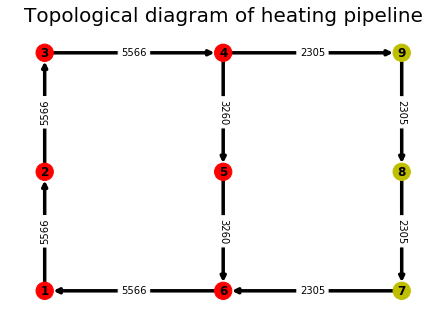

In [42]:
G = nx.DiGraph()  # 建立一个空的有向图G
for i in range(10):
    j = np.nonzero(A[:,i])
#j的数据格式是元组
    if A[j[0][0],i] == 1:
        G.add_edge(j[0][0]+1, j[0][1]+1, weight = int(np.array(G_result)[i]))
        
    else:
        G.add_edge(j[0][1]+1, j[0][0]+1, weight =int(np.array(G_result)[i]))        
# pos接收节点位置排布（字典数据结构）
gPos = {1: np.array([0, 0]),
        2: np.array([0, 1]),
        3: np.array([0, 2]), 
        4: np.array([1, 2]), 
        9: np.array([2, 2]), 
        5: np.array([1, 1]), 
        6: np.array([1, 0]), 
        7: np.array([2, 0]), 
        8: np.array([2, 1])}

#给定每个节点的颜色
colors = ['r','r','r','r','y','r','r','y','y']   
#width是设置边的宽度
nx.draw(G, with_labels=True, font_weight='bold', pos=gPos, node_color=colors,width=3.5)
labels = nx.get_edge_attributes(G, 'weight')
q = nx.draw_networkx_edge_labels(G, pos=gPos, edge_labels=labels)
plt.title("Topological diagram of heating pipeline", fontsize = 20)
# plt.figure(figsize=(120, 160))#图片尺寸还没有调整好
#保存图片要放在plt.show()前面，不然只能保存空白图片
plt.savefig("Topological diagram of heating pipeline.png",format ="PNG")
plt.show()


### networkx绘图的一些参数
nx.draw()方法，至少接受一个参数：待绘制的网络G
参数：

运行样式：
  - `node_size`:  指定节点的尺寸大小(默认是300)
  - `node_color`:  指定节点的颜色 (默认是红色，可以用字符串简单标识颜色，例如'r'为红色，'b'为绿色等)
  - `node_shape`:  节点的形状（默认是圆形，用字符串'o'标识）
  - `alpha`: 透明度 (默认是1.0，不透明，0为完全透明)
  - `width`: 边的宽度 (默认为1.0)
  - `edge_color`: 边的颜色(默认为黑色)
  - `style`: 边的样式(默认为实现，可选： solid|dashed|dotted,dashdot)
  - `with_labels`: 节点是否带标签（默认为True）
  - `font_size`: 节点标签字体大小 (默认为12)
  - `font_color`: 节点标签字体颜色（默认为黑色）

运用布局：
 circular_layout：节点在一个圆环上均匀分布
 random_layout：节点随机分布
 shell_layout：节点在同心圆上分布
 spring_layout： 用Fruchterman-Reingold算法排列节点（样子类似多中心放射状）
 spectral_layout：根据图的拉普拉斯特征向量排列节点

添加文本：
用plt.title()方法可以为图形添加一个标题，该方法接受一个字符串作为参数。
fontsize参数用来指定标题的大小。例如：plt.title("BA Networks", fontsize = 20)。
如果要在任意位置添加文本，则可以采用plt.text()方法。